EDA - 1 

In [2]:
import pandas as pd
df =pd.read_csv(r"C:\Users\DELL\Desktop\pw\BIKE DETAILS.csv")
#Q1
price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of selling prices:", price_range)


Range of selling prices: 755000


In [3]:
#q2
median_price = df['selling_price'].median()
print("Median selling price:", median_price)


Median selling price: 45000.0


In [4]:
#q3
common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", common_seller)


Most common seller type: Individual


In [5]:
#q4
high_km_count = df[df['km_driven'] > 50000].shape[0]
print("Bikes with >50,000 km driven:", high_km_count)


Bikes with >50,000 km driven: 170


In [6]:
#q5
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:\n", avg_km_by_owner)


Average km_driven by ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
#q6
prop_2015_or_older = (df['year'] <= 2015).mean()
print("Proportion of bikes from 2015 or older:", prop_2015_or_older)


Proportion of bikes from 2015 or older: 0.5664467483506126


In [8]:
#q7
missing_trend = df.isnull().sum()
print("Missing values across the dataset:\n", missing_trend)


Missing values across the dataset:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [9]:
#q8
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]
print("Bike with highest ex_showroom_price:\n", max_price_row[['name', 'ex_showroom_price']])


Bike with highest ex_showroom_price:
 name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [10]:
#q9
bikes_by_seller = df['seller_type'].value_counts()
print("Total bikes by seller type:\n", bikes_by_seller)


Total bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


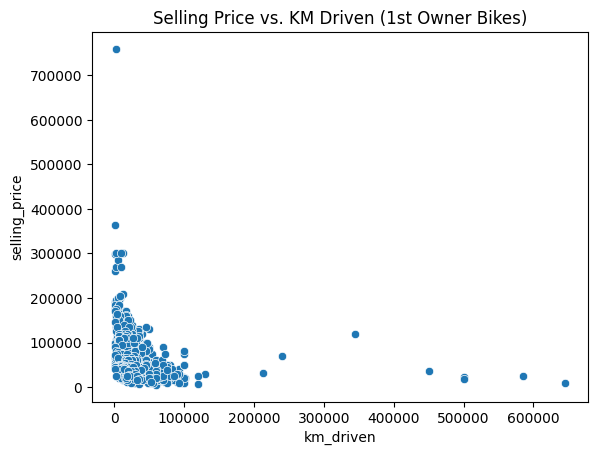

In [11]:
#q10
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df[df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title("Selling Price vs. KM Driven (1st Owner Bikes)")
plt.show()


In [12]:
#q11
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]
print("Outliers removed. New shape:", filtered_df.shape)


Outliers removed. New shape: (1022, 7)


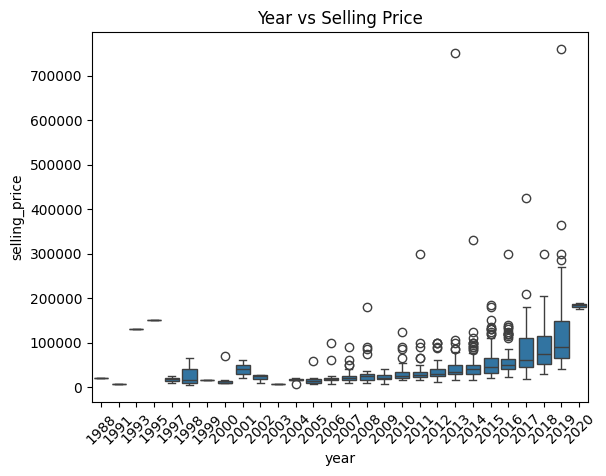

In [13]:
#q12
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.show()


In [14]:
#q13
df['age'] = 2025 - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print("Average depreciation by age:\n", avg_depreciation)


Average depreciation by age:
 age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [15]:
#q14
year_avg = df.groupby('year')['selling_price'].mean()
df['year_avg'] = df['year'].map(year_avg)
expensive_bikes = df[df['selling_price'] > df['year_avg']]
print("Bikes priced significantly above average for their year:\n", expensive_bikes[['name', 'year', 'selling_price']])


Bikes priced significantly above average for their year:
                                       name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


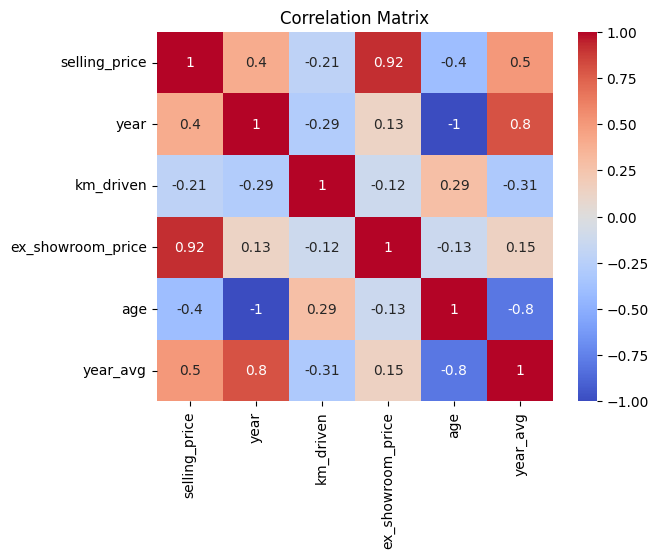

In [16]:
#q15
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


EDA -2 

In [17]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\pw\Car Sale.csv")
#q1

avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print("Average selling price by dealer:\n", avg_price_by_dealer)





Average selling price by dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.5

In [18]:
#q2
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Car brand with highest price variation:\n", price_variation)

# Insight: Higher variation suggests a wider range of models or luxury vs. economy mix.


Car brand with highest price variation:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


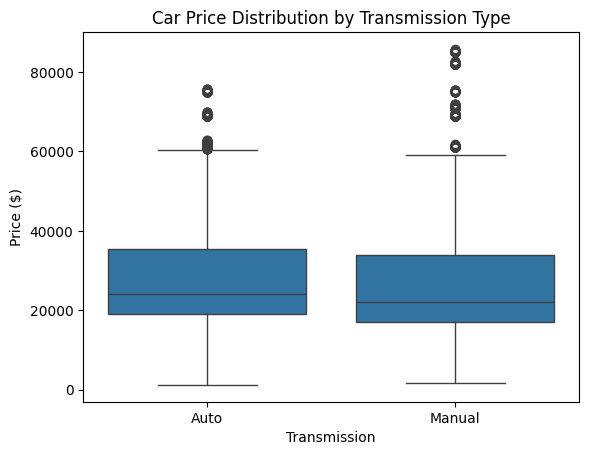

In [19]:
#q3
import seaborn as sns
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Car Price Distribution by Transmission Type')
plt.show()


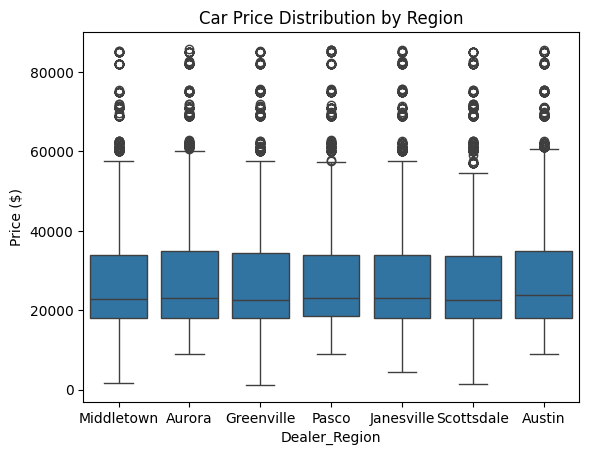

In [20]:
#q4
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Car Price Distribution by Region')
plt.show()


Distribution of cars by body style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


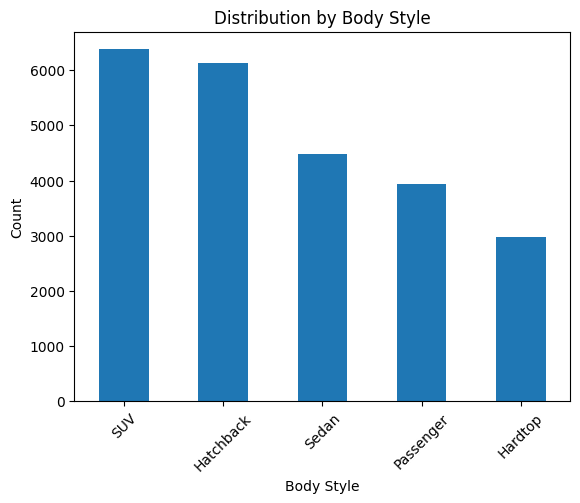

In [21]:
#q5
body_style_counts = df['Body Style'].value_counts()
print("Distribution of cars by body style:\n", body_style_counts)

body_style_counts.plot(kind='bar', title='Distribution by Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Average selling price by gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


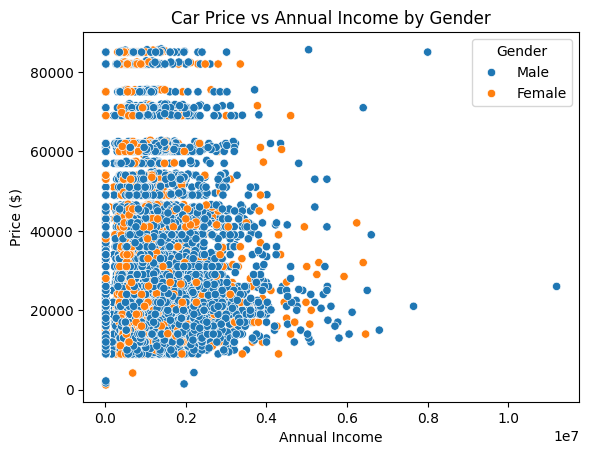

In [22]:
#q6


# Gender-wise average price
gender_price = df.groupby('Gender')['Price ($)'].mean()
print("Average selling price by gender:\n", gender_price)

# Scatter plot of income vs price colored by gender
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Gender')
plt.title('Car Price vs Annual Income by Gender')
plt.show()


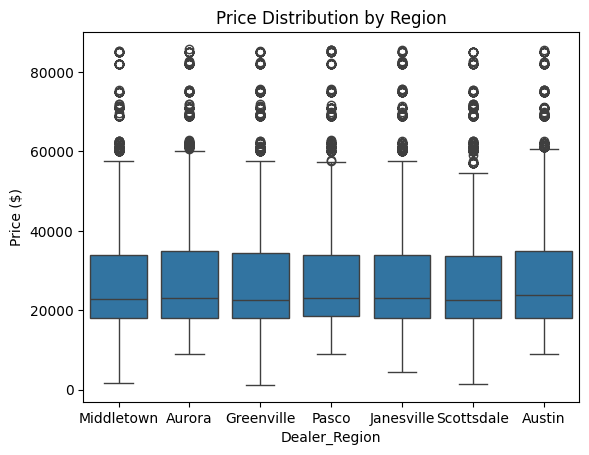

Number of cars sold by region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [23]:
#q7
# Boxplot of prices by region
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Price Distribution by Region')
plt.show()

# Number of cars sold per region
sales_per_region = df['Dealer_Region'].value_counts()
print("Number of cars sold by region:\n", sales_per_region)


Average car price by engine size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


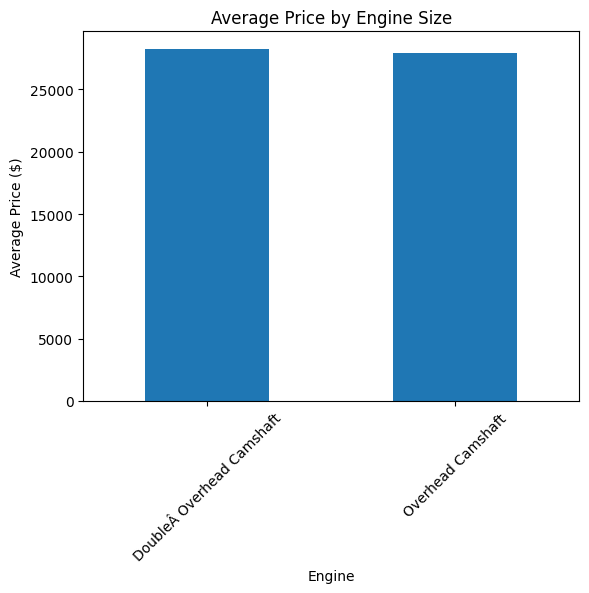

In [24]:
#q8
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average car price by engine size:\n", avg_price_by_engine)

avg_price_by_engine.plot(kind='bar', title='Average Price by Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


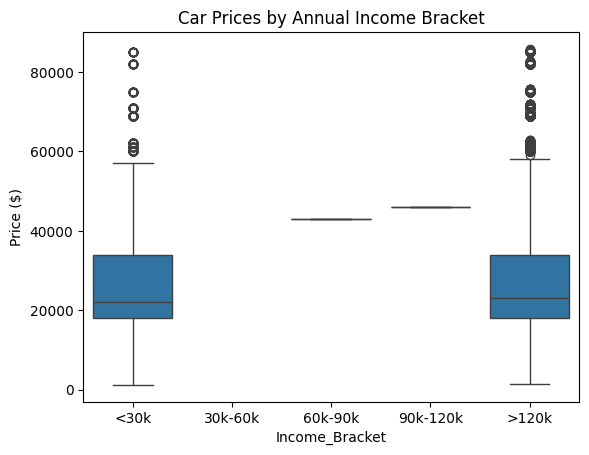

In [25]:
#q9
# Create income brackets
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 90000, 120000, float('inf')], 
                               labels=['<30k', '30k-60k', '60k-90k', '90k-120k', '>120k'])

sns.boxplot(data=df, x='Income_Bracket', y='Price ($)')
plt.title('Car Prices by Annual Income Bracket')
plt.show()


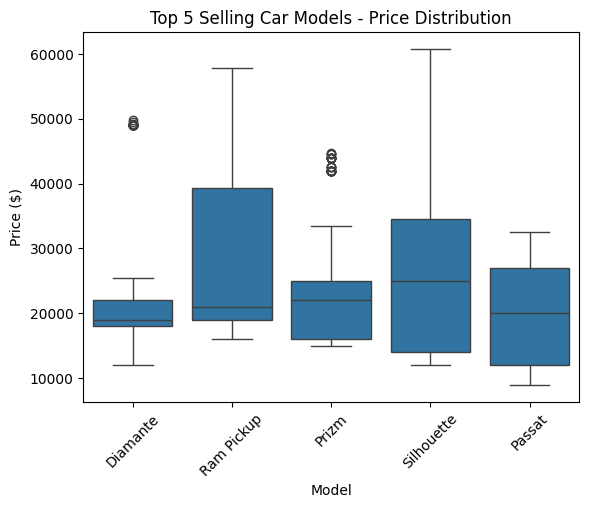

In [26]:
#q10
top_models = df['Model'].value_counts().nlargest(5).index
top_df = df[df['Model'].isin(top_models)]

sns.boxplot(data=top_df, x='Model', y='Price ($)')
plt.title('Top 5 Selling Car Models - Price Distribution')
plt.xticks(rotation=45)
plt.show()


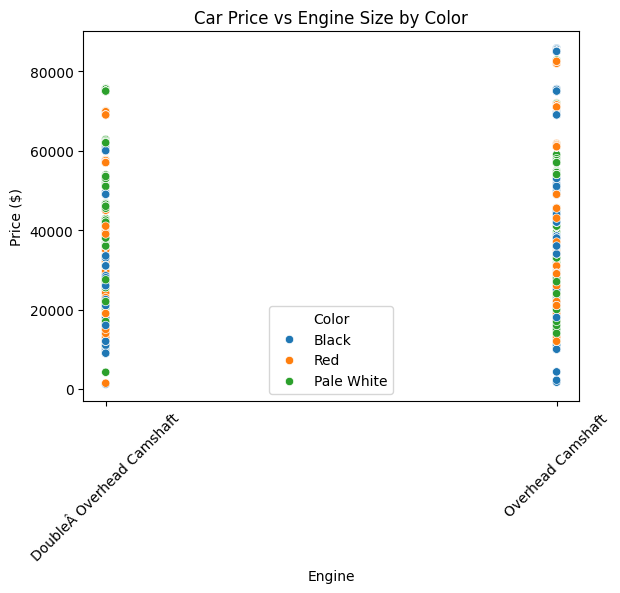

Price variation by color:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [27]:
#q11
sns.scatterplot(data=df, x='Engine', y='Price ($)', hue='Color')
plt.title('Car Price vs Engine Size by Color')
plt.xticks(rotation=45)
plt.show()

# Price variation by color
price_std_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price variation by color:\n", price_std_by_color)


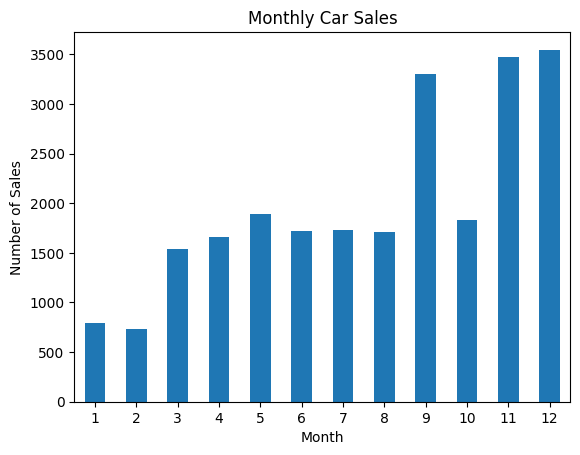

In [28]:
#q12
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

sales_by_month = df['Month'].value_counts().sort_index()

sales_by_month.plot(kind='bar', title='Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.show()


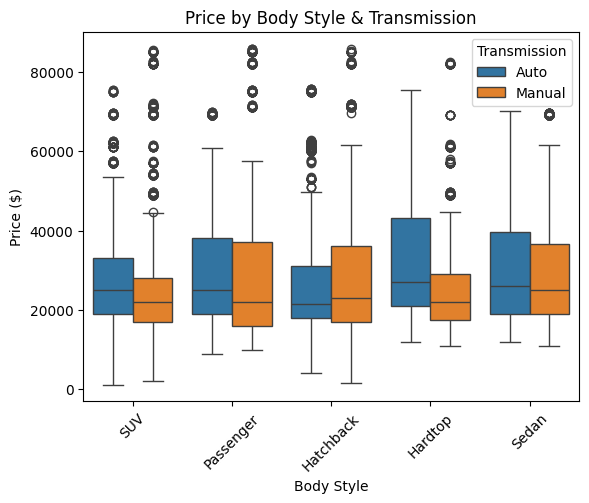

In [29]:
#q13
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Price by Body Style & Transmission')
plt.xticks(rotation=45)
plt.show()


Correlation Matrix:
                Price ($)  Engine_Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine_Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


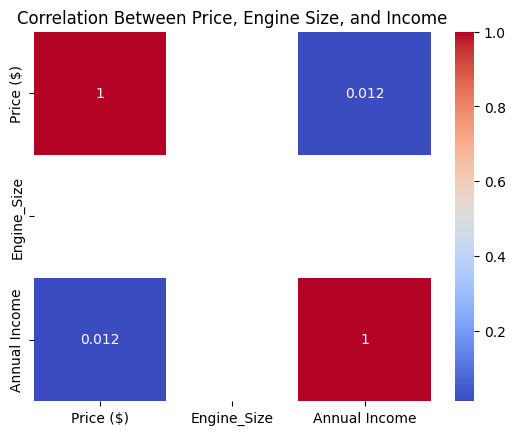

In [ ]:
#q14

df['Engine_Size'] = df['Engine'].str.extract('(\d)').astype(float)

correlation_matrix = df[['Price ($)', 'Engine_Size', 'Annual Income']].corr()
print("Correlation Matrix:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Price, Engine Size, and Income')
plt.show()


Average price by model and engine:
 Model     Engine                   
SC        Overhead Camshaft            61074.818182
Ranger    DoubleÂ Overhead Camshaft    61064.055556
Sable     Overhead Camshaft            61039.770833
Catera    DoubleÂ Overhead Camshaft    56836.933333
LX470     Overhead Camshaft            54037.490196
                                           ...     
A4        Overhead Camshaft            12046.220000
Taurus    DoubleÂ Overhead Camshaft    11665.538462
Escort    Overhead Camshaft            11403.866667
Intrepid  Overhead Camshaft            11069.882353
Mirage    DoubleÂ Overhead Camshaft     9063.368421
Name: Price ($), Length: 261, dtype: float64


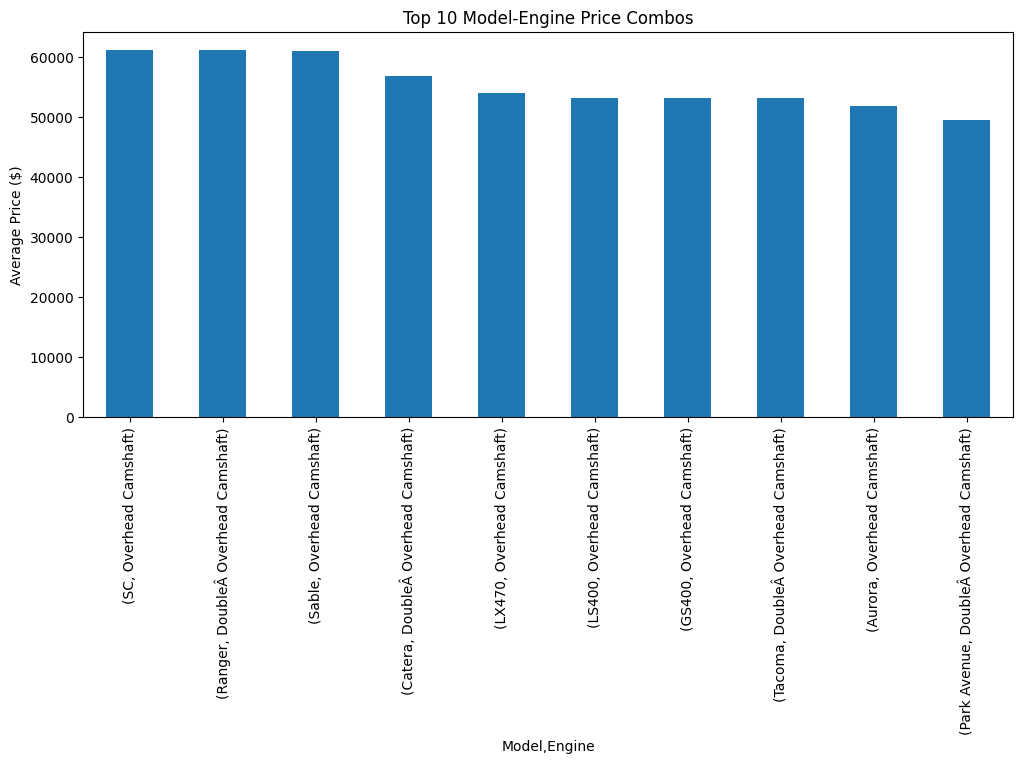

In [31]:
#q15
avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)
print("Average price by model and engine:\n", avg_price)

# Optional: Visualize top 10 combinations
avg_price.head(10).plot(kind='bar', figsize=(12,5), title='Top 10 Model-Engine Price Combos')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()


EDA - 3 

In [ ]:
df =pd.read_csv(r"C:\Users\DELL\Desktop\pw\amazon.csv")
#q1

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_per_category)



category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [34]:
#q2
top_rating_count = df.sort_values(['category', 'rating_count'], ascending=[True, False]).groupby('category').head(1)
print(top_rating_count[['product_name', 'category', 'rating_count']])


                                           product_name  \
1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
772   HUMBLE Dynamic Lapel Collar Mic Voice Recordin...   
844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...                                                 ...   
616   Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
993   Pilot Frixion Clicker Roller Pen (Blue), (9000...   
765              Parker Classic Gold Gold Trim Ball Pen   
850      Pentonic Multicolor Ball Point Pen, Pack of 10   
924   Faber-Castell Connector Pen Set - Pack of 25 (...   

                                               category rating_count  
1157  Car&Motorbike|CarAccessories|InteriorAccessori...        1,118  
695   Computers&Accessories|Accessories&Peripherals|...        4,426  
906   Computers&Accessories|Accessories&Peripherals|...        7,222  
772   C

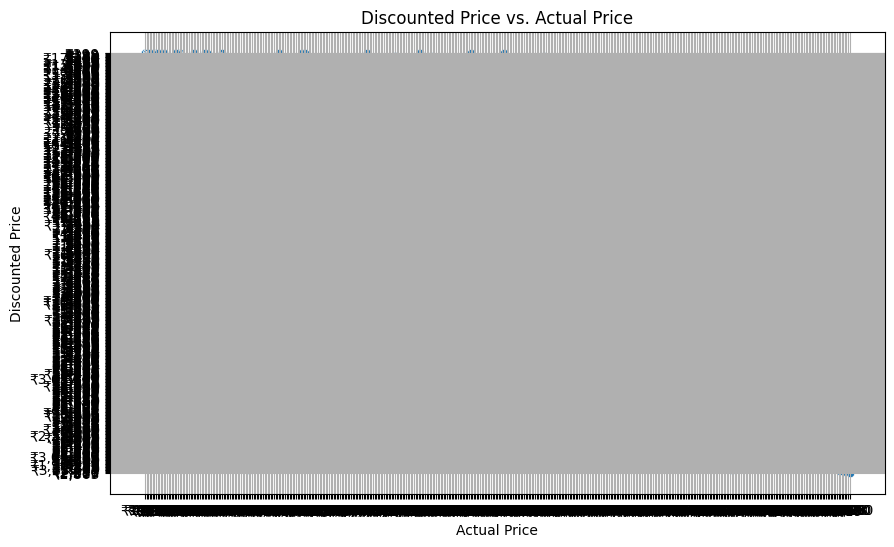

In [35]:
#q3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()


In [38]:
#q5
# Convert rating_count to numeric, forcing errors to NaN
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Now group by product_name and sum rating counts
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

print(popular_products)

popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print(popular_products)


product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Ty

In [39]:
#q6
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['product_name'].astype(str))
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)


Top Keywords: ['10' 'black' 'bluetooth' 'cable' 'charging' 'compatible' 'data' 'fast'
 'hd' 'heater' 'led' 'pro' 'remote' 'smart' 'tv' 'type' 'usb' 'water'
 'white' 'wireless']


In [40]:
#q7
top_reviews = df.sort_values('rating_count', ascending=False)[['review_title', 'review_content', 'rating_count']].head(5)
print(top_reviews)


                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is good but bottle is not good quality,...   
823   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging Speeds Could Be Better,G...   

                                         review_content  rating_count  
1279  Does the job well,doesn't work on sand. though...         992.0  
750   Nive,very good batteries received,Like,Good pr...         989.0  
1059  Bottle quality is not good.,Best for hot water...         976.0  
823   Not charging as fast as I'd have expected. May...         974.0  
32    Not charging as fast as I'd have expected. May...         974.0  


In [42]:
#q8
# Remove ₹ symbol and commas, then convert to numeric
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Also make sure rating is numeric (in case it's not)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now calculate correlation
correlation = df[['discounted_price', 'rating']].corr()
print("Correlation matrix:\n", correlation)


Correlation matrix:
                   discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [43]:
#q9
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [44]:
#q10
missing_data = df.isnull().mean().sort_values(ascending=False)
print("Missing Data Ratio:\n", missing_data)

low_rated_products = df[df['rating'] < 3][['product_name', 'rating', 'review_content']].head(5)
print("Products with low ratings to investigate:\n", low_rated_products)


Missing Data Ratio:
 rating_count           0.777474
rating                 0.000683
product_id             0.000000
product_name           0.000000
discounted_price       0.000000
category               0.000000
discount_percentage    0.000000
actual_price           0.000000
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64
Products with low ratings to investigate:
                                            product_name  rating  \
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...     2.8   
1243  Personal Size Blender, Portable Blender, Batte...     2.3   
1286  MR. BRAND Portable USB Juicer Electric USB Jui...     2.8   
1309  Khaitan ORFin Fan heater for Home and kitchen-...     2.0   
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...     2.6   

      